In [1]:
!python --version

Python 3.11.11


In [22]:
!pip install tensorflow==2.8.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.8.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.8.0


In [93]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 699.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [3]:
import os
import re
import cv2
import tarfile
import datetime
import warnings
import prettytable
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow import concat
from tensorflow import repeat
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
from prettytable import PrettyTable
from skimage.transform import resize
import nltk.translate.bleu_score as bleu
from tensorflow.keras.models import Model
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model
from tensorflow.keras.backend import expand_dims
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import concatenate, Concatenate
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Input, Softmax, RNN, Dense, Embedding, LSTM, Layer, Dropout, GRU

In [4]:
image_model = DenseNet121(weights='/content/drive/MyDrive/Major_Project/Model/brucechou1983_CheXNet_Keras_0.3.0_weights.h5', classes = 14, input_shape=(256,256,3))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model = Model(image_model.input, image_model.layers[-2].output)

In [7]:
train = np.load('/content/drive/MyDrive/Major_Project/Data/train.npy',allow_pickle=True)
test = np.load('/content/drive/MyDrive/Major_Project/Data/test.npy',allow_pickle=True)
validation = np.load('/content/drive/MyDrive/Major_Project/Data/validation.npy',allow_pickle=True)

In [8]:
columns = ["front X-Ray", "lateral X-Ray", "findings", "dec_ip", "dec_op", "image_features"]

train = pd.DataFrame(train, columns = columns)
test = pd.DataFrame(test, columns = columns)
validation = pd.DataFrame(validation, columns = columns)

In [9]:
print("train data -     ",train.shape)
print('test data -      ',test.shape)
print('validation data -',validation.shape)

train data -      (3200, 6)
test data -       (399, 6)
validation data - (350, 6)


In [10]:
train.head()

,front X-Ray,lateral X-Ray,findings,dec_ip,dec_op,image_features
0,CXR167_IM-0441-1001.png,CXR167_IM-0441-1002.png,<start> both lungs are clear and expanded an o...,<start> both lungs are clear and expanded an o...,both lungs are clear and expanded an old calci...,"[[5.7280434702988714e-05, 0.001676254905760288..."
1,CXR2561_IM-1064-1001.png,CXR2561_IM-1064-1001.png,<start> lungs are clear bilaterally cardiac an...,<start> lungs are clear bilaterally cardiac an...,lungs are clear bilaterally cardiac and medias...,"[[2.7444737497717142e-05, 0.001650683116167783..."
2,CXR2592_IM-1084-2001.png,CXR2592_IM-1084-1001.png,<start> the lungs are clear there is no pleura...,<start> the lungs are clear there is no pleura...,the lungs are clear there is no pleural effusi...,"[[0.00013672266504727304, 0.001249730121344328..."
3,CXR218_IM-0792-0001.png,CXR218_IM-0792-4004.png,<start> heart size is unchanged aortic calcifi...,<start> heart size is unchanged aortic calcifi...,heart size is unchanged aortic calcification i...,"[[4.9161011702381074e-05, 0.001062895520590245..."
4,CXR55_IM-2154-2001.png,CXR55_IM-2154-1001.png,<start> lung lines remain low however no focal...,<start> lung lines remain low however no focal...,lung lines remain low however no focal infiltr...,"[[0.0, 0.0013188612647354603, 0.00152136199176..."


In [41]:
# token = Tokenizer( filters='!"#$%&()*+,-/:;=?@[\\]^_`{|}~\t\n')
# token.fit_on_texts(train['findings'])

# token.word_index['<pad>'] = 0
# token.index_word[0] = '<pad>'
# vocab_size = len(token.word_index) + 1
# print('Vocab size - ', vocab_size)

# #sequence in train and validation
# train_inp_dec = token.texts_to_sequences(train.dec_ip)
# train_op_dec = token.texts_to_sequences(train.dec_op)
# val_inp_dec = token.texts_to_sequences(validation.dec_ip)
# val_op_dec = token.texts_to_sequences(validation.dec_op)

# #padding in the train and validation
# max_len = 100
# decoder_input = pad_sequences(train_inp_dec, maxlen=max_len, padding='post')
# decoder_output =  pad_sequences(train_op_dec, maxlen=max_len, padding='post')
# Validation_decoder_input = pad_sequences(val_inp_dec, maxlen=max_len, padding='post')
# Validation_decoder_output = pad_sequences(val_op_dec, maxlen=max_len, padding='post')
# print(decoder_input[:1])

# word_idx = {}
# idx_word = {}
# for key, value in (token.word_index).items():
#     word_idx[key] = value
#     idx_word[value] = key

# New one

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize Tokenizer with minimal filtering
token = Tokenizer(filters='')  # Retain all characters
token.fit_on_texts(train['findings'])

# Add padding token explicitly before fitting
token.word_index['<pad>'] = 0
token.index_word[0] = '<pad>'

# Vocabulary size (after including <pad>)
vocab_size = len(token.word_index) + 1
print('Vocab size:', vocab_size)

# Convert text to sequences
train_inp_dec = token.texts_to_sequences(train['dec_ip'])
train_op_dec = token.texts_to_sequences(train['dec_op'])
val_inp_dec = token.texts_to_sequences(validation['dec_ip'])
val_op_dec = token.texts_to_sequences(validation['dec_op'])

# Dynamic max_len based on the longest sequence
max_len = max(max(len(seq) for seq in train_inp_dec),
              max(len(seq) for seq in train_op_dec),
              max(len(seq) for seq in val_inp_dec),
              max(len(seq) for seq in val_op_dec))

# Apply padding
decoder_input = pad_sequences(train_inp_dec, maxlen=max_len, padding='post')
decoder_output = pad_sequences(train_op_dec, maxlen=max_len, padding='post')
Validation_decoder_input = pad_sequences(val_inp_dec, maxlen=max_len, padding='post')
Validation_decoder_output = pad_sequences(val_op_dec, maxlen=max_len, padding='post')

# Print first padded sequence
print(decoder_input[:1])

# Word-index mappings
word_idx = token.word_index  # Already stored in Tokenizer
idx_word = {v: k for k, v in token.word_index.items()}

Vocab size: 1447
[[  5  99  16   4  20   8 103 143 214  55  87   3  79  22   1  29  62  70
   15   8  38   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


### Writing Encoder :

In [63]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''
    def __init__(self,lstm_units):
        super().__init__()

        self.lstm_units = lstm_units
        self.dense      = Dense(self.lstm_units, kernel_initializer="glorot_uniform", name = 'encoder_dense_layer')

    def initialize_states(self,batch_size):

      self.batch_size  = batch_size
      self.enc_h       = tf.zeros((self.batch_size, self.lstm_units))

      return self.enc_h

    def call(self,x):

      # x : image_data
      encoder_output = self.dense(x)

      return encoder_output

## Writing Attention :

In [64]:
class Attention(tf.keras.layers.Layer):
  '''
    Class that calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,attention_units):
    super().__init__()

    self.attention_units = attention_units

    self.w1_Dense    =  tf.keras.layers.Dense(self.attention_units, kernel_initializer="glorot_uniform", name='Concat_w1_Dense')
    self.w2_Dense    =  tf.keras.layers.Dense(self.attention_units, kernel_initializer="glorot_uniform", name='Concat_w2_Dense')
    self.Concat_Dense=  tf.keras.layers.Dense(1, kernel_initializer="glorot_uniform", name = 'Concat_Dense_layer')

  def call(self,x):

    self.decoder_hidden_state, self.encoder_output = x
    self.decoder_hidden_state = tf.expand_dims(self.decoder_hidden_state,axis = 1)

    score = self.Concat_Dense(tf.nn.tanh(self.w1_Dense(self.decoder_hidden_state) + self.w2_Dense(self.encoder_output)))

    att_weights    = tf.nn.softmax(score, axis=1)
    context_vector = att_weights * self.encoder_output
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector,att_weights

## Writing Onestepdecoder :

In [65]:
class OneStepDecoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
      super().__init__()

      self.lstm_units     = lstm_units
      self.vocab_size     = vocab_size
      self.embedding_dim  = embedding_dim
      self.attention_units= attention_units

      self.dense       = Dense(self.vocab_size, kernel_initializer="glorot_uniform", name ='onestep_dense')
      self.attention   = Attention( self.attention_units)
      self.decoder_emb = Embedding(self.vocab_size, self.embedding_dim, trainable = True , name = 'Decoder_embedding')
      self.decoder_gru = GRU(self.lstm_units, return_state=True, return_sequences=True, name="Decoder_LSTM")


      self.dropout1 = Dropout(0.2,name = 'dropout1')
      self.dropout2 = Dropout(0.2,name = 'dropout2')
      self.dropout3 = Dropout(0.2,name = 'dropout3')

  @tf.function
  def call(self,x,training=None):

    self.input_to_decoder, self.encoder_output, self.state_h = x

    embedded_output = self.decoder_emb(self.input_to_decoder)
    embedded_output = self.dropout1(embedded_output)

    y = [self.state_h,self.encoder_output]
    context_vector, att_weights = self.attention(y)

    concated_decoder_input = tf.concat([tf.expand_dims(context_vector, 1),embedded_output], -1)
    concated_decoder_input = self.dropout2(concated_decoder_input)

    output_gru, hidden_state = self.decoder_gru(concated_decoder_input, initial_state=self.state_h)

    output_gru = tf.reshape(output_gru, (-1, output_gru.shape[2]))
    output_gru = self.dropout3(output_gru)

    output = self.dense(output_gru)

    return output,hidden_state,att_weights,context_vector

## Writing Decoder :

In [66]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
      super().__init__()

      self.lstm_units     = lstm_units
      self.vocab_size     = vocab_size
      self.embedding_dim  = embedding_dim
      self.attention_units= attention_units

      self.onestepdecoder = OneStepDecoder(self.vocab_size, self.embedding_dim, self.lstm_units, self.attention_units)

    @tf.function
    def call(self, x,training=None):

        self.input_to_decoder, self.encoder_output, self.decoder_hidden_state = x
        all_outputs = tf.TensorArray(tf.float32,size = self.input_to_decoder.shape[1], name = 'output_arrays' )

        for timestep in tf.range(self.input_to_decoder.shape[1]):

          y = [self.input_to_decoder[:,timestep:timestep+1],self.encoder_output, self.decoder_hidden_state]
          output,hidden_state,att_weights,context_vector = self.onestepdecoder(y)

          self.decoder_hidden_state = hidden_state
          all_outputs = all_outputs.write(timestep,output)

        all_outputs = tf.transpose(all_outputs.stack(),[1,0,2])

        return all_outputs

## Encoder-Decoder Model :

In [67]:
class Encoder_decoder(tf.keras.Model):
  """
     # Intialize encoder states, Pass the encoder_sequence to the embedding layer
     # Decoder initial states are encoder final states, Initialize it accordingly
     # Pass the decoder sequence,encoder_output,decoder states to Decoder
     # return the decoder output

  """
  def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units, batch_size):
        super().__init__()

        self.vocab_size     = vocab_size
        self.batch_size     = batch_size
        self.lstm_units     = lstm_units
        self.embedding_dim  = embedding_dim
        self.attention_units= attention_units

        self.encoder = Encoder(self.lstm_units)
        self.decoder = Decoder(vocab_size, embedding_dim, lstm_units, attention_units)
        self.dense   = Dense(self.vocab_size, kernel_initializer="glorot_uniform", name = 'enc_dec_dense')



  def call(self,data):

    self.inputs, self.outputs = data[0], data[1]

    self.encoder_hidden = self.encoder.initialize_states(self.batch_size)
    self.encoder_output = self.encoder(self.inputs)

    x = [self.outputs,self.encoder_output,self.encoder_hidden]
    output = self.decoder(x)

    return output

## Writing Custom loss function :

In [31]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

**Load Encoder-Decoder Model :**

In [32]:
lstm_units     = 256
batch_size     = 50
Buffer_size    = 500
embedding_dim  = 300
attention_units= 64

In [33]:
tf.keras.backend.clear_session()
#This will clear all tensorflow session
Attention_model = Encoder_decoder(vocab_size,embedding_dim,lstm_units,attention_units,batch_size)
Attention_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=loss_function)

**CallBacks** :

In [34]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [24]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  patience = 10, baseline=None, verbose = 1, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode = 'min',verbose = 1, patience=5, min_lr=0.000001)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

**Create Datasets :**

In [36]:
# Reshaping the image feature tensors for training
train_image_features = np.vstack(train.image_features).astype(np.float64)
validation_image_features = np.vstack(validation.image_features).astype(np.float64)

In [37]:
train_dataset = tf.data.Dataset.from_tensor_slices(((train_image_features, decoder_input), decoder_output))
train_dataset = train_dataset.shuffle(Buffer_size).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_dataset = tf.data.Dataset.from_tensor_slices(((validation_image_features,Validation_decoder_input),Validation_decoder_output))
validation_dataset = validation_dataset.shuffle(Buffer_size).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [45]:
!wget --header="Host: openi.nlm.nih.gov" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://openi.nlm.nih.gov/faq" --header="Cookie: ncbi_sid=8A1BC6C8FFB50A11_1682SID; pmc.article.report=; _ga=GA1.2.1024901484.1610305706; lbnodeid=909381250.47873.0000; _ga=GA1.4.1024901484.1610305706; JSESSIONID=BD77221C4057639243BF80CB72FE15EA; _gid=GA1.2.1261986835.1621316665; _gid=GA1.4.1261986835.1621316665; _gat=1; _gat_nlmtracker=1; _gat_UA-137948717-1=1" --header="Connection: keep-alive" "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz" -c -O 'NLMCXR_png.tgz'

--2025-02-08 11:57:52--  https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.65.157, 2607:f220:41e:7065::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.65.157|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1360814128 (1.3G), 1176668874 (1.1G) remaining [application/x-gzip]
Saving to: ‘NLMCXR_png.tgz’

NLMCXR_png.tgz      100%[++=================>]   1.27G   666KB/s    in 29m 16s 

2025-02-08 12:27:09 (654 KB/s) - ‘NLMCXR_png.tgz’ saved [1360814128/1360814128]



In [46]:
import tarfile
cwd = os.getcwd()
images = tarfile.open('/content/NLMCXR_png.tgz')
images.extractall(cwd+'/images/')

**Model-training :**

In [38]:
Attention_model.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=[early_stop,reduce_lr,tensorboard], shuffle=True)

Epoch 1/20
64/64 [==============================] - 189s 3s/step - loss: 1.1548 - val_loss: 1.1259 - lr: 0.0010
Epoch 2/20
64/64 [==============================] - 176s 3s/step - loss: 1.0861 - val_loss: 1.0763 - lr: 0.0010
Epoch 3/20
64/64 [==============================] - 183s 3s/step - loss: 1.0185 - val_loss: 0.9984 - lr: 0.0010
Epoch 4/20
64/64 [==============================] - 176s 3s/step - loss: 0.9260 - val_loss: 0.8700 - lr: 0.0010
Epoch 5/20
64/64 [==============================] - 175s 3s/step - loss: 0.7571 - val_loss: 0.6888 - lr: 0.0010
Epoch 6/20
64/64 [==============================] - 185s 3s/step - loss: 0.6216 - val_loss: 0.6009 - lr: 0.0010
Epoch 7/20
64/64 [==============================] - 178s 3s/step - loss: 0.5511 - val_loss: 0.5533 - lr: 0.0010
Epoch 8/20
64/64 [==============================] - 178s 3s/step - loss: 0.5082 - val_loss: 0.5214 - lr: 0.0010
Epoch 9/20
64/64 [==============================] - 178s 3s/step - loss: 0.4768 - val_loss: 0.4997 - lr:

In [39]:
Attention_model.save_weights('Attention_modelv1.weights.h5')
!cp Attention_modelv1.weights.h5 "drive/My Drive/"

In [40]:
def load_image(img_name):
  """Loads image in array format"""

  image = Image.open(img_name)
  X = np.asarray(image.convert("RGB"))
  X = np.asarray(X)
  X = preprocess_input(X)
  X = resize(X, (256,256,3))
  X = np.expand_dims(X, axis=0)
  X = np.asarray(X)

  return X

In [41]:
def preprocess(image1_paths,image2_paths):

  '''
    input -- dataframe(df)
    output -- dataframe(df)
    process - convert images into 256 X 256, then using CHeXNET model generate tensor(concate two image tensor)

  '''
  path = '/content/images/'
  image_features = []
  for i in range(len(image1_paths)):

    i1 = load_image(path+image1_paths)
    i2 = load_image(path+image2_paths)
    img1_features = model.predict(i1)
    img2_features = model.predict(i2)
    img1_features = np.vstack(img1_features).astype(np.float)
    img2_features = np.vstack(img2_features).astype(np.float)

    tensor = np.concatenate((img1_features, img2_features), axis=1)

  return tensor

In [42]:
def evaluate(image1, image2):
    '''
    Input - two image and image path
    output - return medical report of the images
    This function takes images and using encoder decoder model
    return medical report of the images
    The function predicts the sentence using beam search

    '''
    img_tensor     = preprocess(image1, image2)
    image_features = np.vstack(img_tensor).astype(np.float)

    result = ''
    initial_state = Attention_model.layers[0].initialize_states(1)
    sequences     = [['<start>', initial_state, 0]]

    encoder_output       = Attention_model.layers[0](image_features)
    decoder_hidden_state = initial_state

    max_len = 75
    beam_width = 3
    finished_seq = []

    for i in range(max_len):#traverse through all lengths
        new_seq = [] #stores the seq which does not have <end> in them
        all_probable = [] #stores all the top k seq along with their scores

        for seq,state,score in sequences: #traverse for all top k sequences

            cur_vec = np.reshape(word_idx[seq.split(" ")[-1]],(1,1))
            decoder_hidden_state = state
            x = [cur_vec, encoder_output, decoder_hidden_state]
            output,hidden_state,att_weights,context_vector = Attention_model.get_layer('decoder').onestepdecoder(x)
            output = tf.nn.softmax(output)
            top_words = np.argsort(output).flatten()[-beam_width:] #get the top k words
            for index in top_words:
                #here we will update score with log of probabilities and subtracting(log of prob will be in negative)
                #here since its -(log), lower the score higher the prob
                predicted = [seq + ' '+ idx_word[index], hidden_state, score-np.log(np.array(output).flatten()[index])] #updating the score and seq
                all_probable.append(predicted)

        sequences = sorted(all_probable, key = lambda l: l[2])[:beam_width] #getting the top 3 sentences with high prob ie low score

        count = 0
        for seq,state,score in sequences: #check for 'endseq' in each seq in the beam
            if seq.split(" ")[-1] == '<end>': #if last word of the seq is <end>
                score = score/len(seq) #normalizing
                finished_seq.append([seq,state,score])
                count+=1
            else:
                new_seq.append([seq,state,score])

        sequences = new_seq
        beam_width= beam_width - count #substracting the no. of finished sentences from beam length

        if not sequences: #if all the sequences reaches its end
            break
        else:
            continue

    if len(finished_seq) >0:
          finished_seq = sorted(finished_seq, reverse=True, key = lambda l: l[2]) # Reverse Sorted the Predicted output by score measure
          sequences = finished_seq[-1] #getting the last predicted output with least probablity score.
          k=0
          for i in finished_seq:
            k+=1
            print('Beam probablity-',i[2],'Candidate',k,':',i[0]) #printing top k predicted sentence by beam serch and their probablity score
          return sequences[0]
    else:
          return new_seq[-1][0]

In [43]:
def test_img_cap(img_data):

    '''
    input - imagedata point contain two x ray image and acutal medical report of the images
    output - function return two images and its original and predical medical report
    also return bleu score of the context

    '''
    path = '/content/images/'

    fig, axs = plt.subplots(1, 2, figsize = (10,10), tight_layout=True)
    count = 0
    for img, subplot in zip(img_data[:2], axs.flatten()):
        img_= mpimg.imread(path+img)
        imgplot = axs[count].imshow(img_, cmap = 'bone')
        count +=1
    plt.show()

    print('Acutal Report :', img_data[2])
    print('*'*200)
    result = evaluate(img_data[0],img_data[1])
    print('*'*200)
    print("Best Predicted:",result)
    print('BLEU Score :-',sentence_bleu(img_data[2], result),'\n')

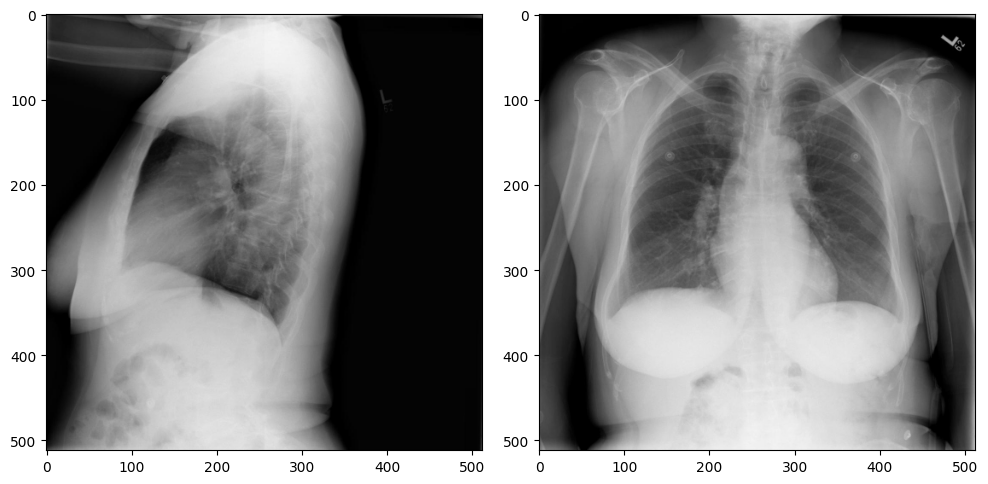

Acutal Report : <start> stable cardiomediastinal silhouette with borderline heart size and aortic ectasia tortuosity stable hyperinflation without focal alveolar consolidation no definite pleural effusion seen no typical findings of pulmonary edema healed left rib fractures again noted <end>
********************************************************************************************************************************************************************************************************
1/1 [==============================] - 0s 213ms/step
Beam probablity- 0.08343842346221209 Candidate 1 : <start> no findings <end>
Beam probablity- 0.0694186726645769 Candidate 2 : <start> the heart is normal in size the lungs are clear there is no pleural effusion or pneumothorax there is no focal air space opacity to suggest a pneumonia there is no pleural effusion or pneumothorax the lungs are clear <end>
Beam probablity- 0.06594493919082227 Candidate 3 : <start> the heart is normal in size the medi

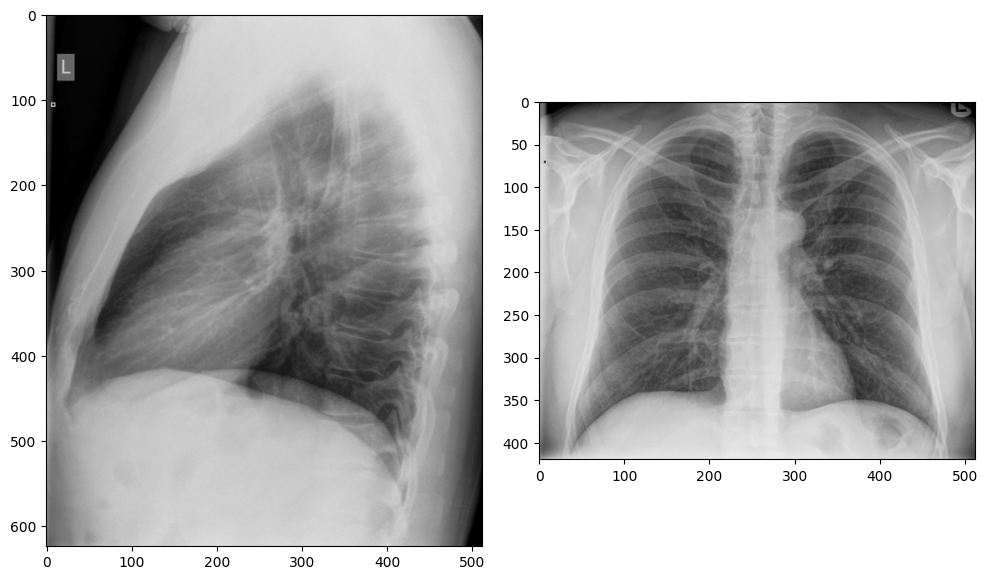

Acutal Report : <start> the heart size and pulmonary vascularity appear within normal limits the lungs are free of focal airspace disease no pleural effusion or pneumothorax is seen <end>
********************************************************************************************************************************************************************************************************
1/1 [==============================] - 0s 372ms/step
Beam probablity- 0.08232847634702921 Candidate 1 : <start> no findings <end>
Beam probablity- 0.07532702349126338 Candidate 2 : <start> the heart is normal in size the lungs are clear there is no pleural effusion or pneumothorax there is no focal air space opacity to suggest a pneumonia there is no pleural effusion or pneumothorax the lungs are clear <end>
Beam probablity- 0.06263357600463289 Candidate 3 : <start> the heart is normal in size the lungs are clear there is no pleural effusion or pneumothorax the lungs are clear <end>
*********************

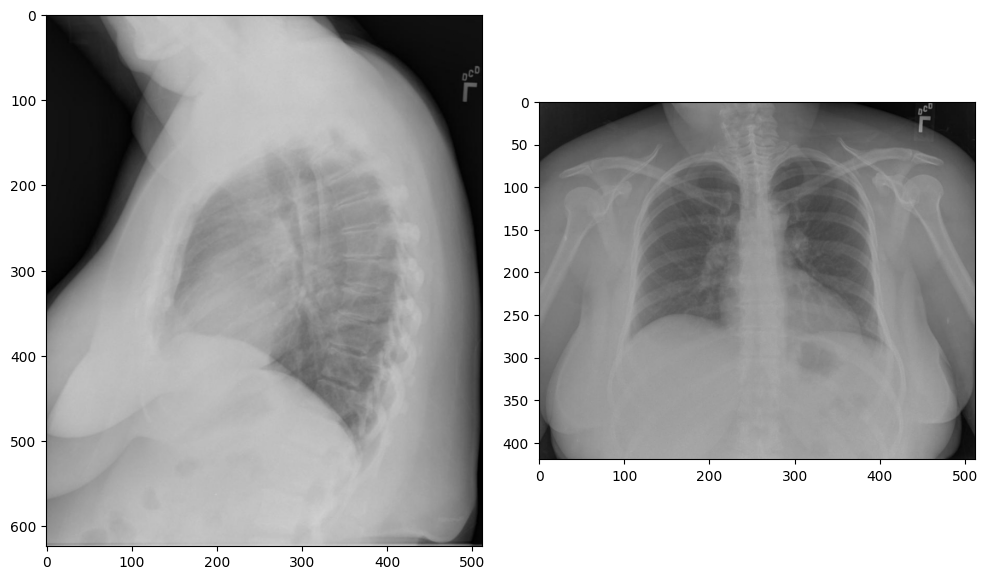

Acutal Report : <start> lungs are clear bilaterally cardiac and mediastinal silhouettes are normal pulmonary vasculature is normal no pneumothorax or pleural effusion no acute bony abnormality <end>
********************************************************************************************************************************************************************************************************
1/1 [==============================] - 0s 209ms/step
Beam probablity- 0.08325383082032203 Candidate 1 : <start> no findings <end>
Beam probablity- 0.07523198555866928 Candidate 2 : <start> the heart size and pulmonary vascularity are within normal limits there is no focal airspace opacity no pleural effusion or pneumothorax no pleural effusion or pneumothorax is seen <end>
Beam probablity- 0.07470336221881861 Candidate 3 : <start> the heart size and pulmonary vascularity are within normal limits there is no focal airspace opacity no pleural effusion or pneumothorax no pleural effusion or pneum

In [47]:
for i in test.values[17:20]:
    test_img_cap(i)

## New code here

In [48]:
# Import required libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.models import Model

# Define Encoder, Attention, OneStepDecoder, Decoder, and Encoder_decoder classes again
class Encoder(tf.keras.Model):
    def __init__(self, lstm_units):
        super().__init__()
        self.lstm_units = lstm_units
        self.dense = Dense(self.lstm_units, kernel_initializer="glorot_uniform", name='encoder_dense_layer')

    def initialize_states(self, batch_size):
        return tf.zeros((batch_size, self.lstm_units))

    def call(self, x):
        return self.dense(x)

class Attention(tf.keras.layers.Layer):
    def __init__(self, attention_units):
        super().__init__()
        self.w1_Dense = Dense(attention_units, kernel_initializer="glorot_uniform", name='Concat_w1_Dense')
        self.w2_Dense = Dense(attention_units, kernel_initializer="glorot_uniform", name='Concat_w2_Dense')
        self.Concat_Dense = Dense(1, kernel_initializer="glorot_uniform", name='Concat_Dense_layer')

    def call(self, inputs):
        decoder_hidden_state, encoder_output = inputs
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state, axis=1)
        score = self.Concat_Dense(tf.nn.tanh(self.w1_Dense(decoder_hidden_state) + self.w2_Dense(encoder_output)))
        att_weights = tf.nn.softmax(score, axis=1)
        context_vector = att_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, att_weights

class OneStepDecoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
        super().__init__()
        self.lstm_units = lstm_units
        self.embedding = Embedding(vocab_size, embedding_dim, trainable=True)
        self.attention = Attention(attention_units)
        self.gru = GRU(lstm_units, return_state=True, return_sequences=True)
        self.dense = Dense(vocab_size, kernel_initializer="glorot_uniform")

    def call(self, inputs):
        input_to_decoder, encoder_output, state_h = inputs
        embedded_output = self.embedding(input_to_decoder)
        context_vector, att_weights = self.attention([state_h, encoder_output])
        concated_decoder_input = tf.concat([tf.expand_dims(context_vector, 1), embedded_output], -1)
        output_gru, hidden_state = self.gru(concated_decoder_input, initial_state=state_h)
        output = self.dense(tf.reshape(output_gru, (-1, output_gru.shape[2])))
        return output, hidden_state, att_weights, context_vector

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
        super().__init__()
        self.onestepdecoder = OneStepDecoder(vocab_size, embedding_dim, lstm_units, attention_units)

    def call(self, inputs):
        input_to_decoder, encoder_output, decoder_hidden_state = inputs
        all_outputs = tf.TensorArray(tf.float32, size=input_to_decoder.shape[1])
        for timestep in tf.range(input_to_decoder.shape[1]):
            output, hidden_state, _, _ = self.onestepdecoder(
                [input_to_decoder[:, timestep:timestep+1], encoder_output, decoder_hidden_state]
            )
            decoder_hidden_state = hidden_state
            all_outputs = all_outputs.write(timestep, output)
        all_outputs = tf.transpose(all_outputs.stack(), [1, 0, 2])
        return all_outputs

class Encoder_decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units, batch_size):
        super().__init__()
        self.encoder = Encoder(lstm_units)
        self.decoder = Decoder(vocab_size, embedding_dim, lstm_units, attention_units)

    def call(self, data):
        inputs, outputs = data
        encoder_hidden = self.encoder.initialize_states(inputs.shape[0])
        encoder_output = self.encoder(inputs)
        output = self.decoder([outputs, encoder_output, encoder_hidden])
        return output


In [50]:
# Set model parameters (same as during training)
vocab_size = 5000  # Make sure this matches your tokenizer vocabulary size
embedding_dim = 300
lstm_units = 256
attention_units = 64
batch_size = 1  # In inference, we process one sample at a time

# Reinitialize the model and load weights
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)
Attention_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=loss_function)

# Load the trained weights
Attention_model.load_weights('/content/Attention_modelv1.weights.h5')
print("Model weights loaded successfully!")


ValueError: Layer 'Concat_Dense_layer' expected 0 variables, but received 2 variables during loading. Expected: []

In [51]:
# Set model parameters (same as during training)
vocab_size = 1915  # Make sure this matches your tokenizer vocabulary size during training
embedding_dim = 300
lstm_units = 256
attention_units = 64
batch_size = 1  # In inference, we process one sample at a time

# Reinitialize the model and load weights
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)
Attention_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=loss_function)

# Load the trained weights, specifying by_name=True to handle potential naming issues
Attention_model.load_weights('/content/drive/My Drive/Attention_modelv1.weights.h5', by_name=True)
print("Model weights loaded successfully!")

ValueError: Layer 'Concat_Dense_layer' expected 0 variables, but received 2 variables during loading. Expected: []

In [52]:
# Set model parameters (same as during training)
vocab_size = 1915  # This should be the same as during training
embedding_dim = 300
lstm_units = 256
attention_units = 64
batch_size = 1  # In inference, we process one sample at a time

# Reinitialize the model and load weights
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)
Attention_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=loss_function)

# Load the trained weights, specifying by_name=True to handle potential naming issues
Attention_model.load_weights('/content/drive/My Drive/Attention_modelv1.weights.h5', by_name=True)
print("Model weights loaded successfully!")

ValueError: Layer 'Concat_Dense_layer' expected 0 variables, but received 2 variables during loading. Expected: []

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
import numpy as np

# Define the model architecture
class OneStepDecoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
        super().__init__()

        self.lstm_units = lstm_units
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.attention_units = attention_units

        self.dense = Dense(self.vocab_size, kernel_initializer="glorot_uniform", name='onestep_dense')
        self.attention = Attention(self.attention_units)
        self.decoder_emb = Embedding(self.vocab_size, self.embedding_dim, trainable=True, name='Decoder_embedding')
        self.decoder_gru = GRU(self.lstm_units, return_state=True, return_sequences=True, name="Decoder_LSTM")

        self.dropout1 = Dropout(0.2, name='dropout1')
        self.dropout2 = Dropout(0.2, name='dropout2')
        self.dropout3 = Dropout(0.2, name='dropout3')

    def call(self, x, training=None):
        self.input_to_decoder, self.encoder_output, self.state_h = x

        embedded_output = self.decoder_emb(self.input_to_decoder)
        embedded_output = self.dropout1(embedded_output)

        y = [self.state_h, self.encoder_output]
        context_vector, att_weights = self.attention(y)

        concated_decoder_input = tf.concat([tf.expand_dims(context_vector, 1), embedded_output], -1)
        concated_decoder_input = self.dropout2(concated_decoder_input)

        output_gru, hidden_state = self.decoder_gru(concated_decoder_input, initial_state=self.state_h)

        output_gru = tf.reshape(output_gru, (-1, output_gru.shape[2]))
        output_gru = self.dropout3(output_gru)

        output = self.dense(output_gru)

        return output, hidden_state, att_weights, context_vector


class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units):
        super().__init__()

        self.lstm_units = lstm_units
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.attention_units = attention_units

        self.onestepdecoder = OneStepDecoder(self.vocab_size, self.embedding_dim, self.lstm_units, self.attention_units)

    def call(self, x, training=None):
        self.input_to_decoder, self.encoder_output, self.decoder_hidden_state = x
        all_outputs = tf.TensorArray(tf.float32, size=self.input_to_decoder.shape[1], name='output_arrays')

        for timestep in tf.range(self.input_to_decoder.shape[1]):
            y = [self.input_to_decoder[:, timestep:timestep+1], self.encoder_output, self.decoder_hidden_state]
            output, hidden_state, att_weights, context_vector = self.onestepdecoder(y)

            self.decoder_hidden_state = hidden_state
            all_outputs = all_outputs.write(timestep, output)

        all_outputs = tf.transpose(all_outputs.stack(), [1, 0, 2])

        return all_outputs


class Encoder_decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units, attention_units, batch_size):
        super().__init__()

        self.vocab_size = vocab_size
        self.batch_size = batch_size
        self.lstm_units = lstm_units
        self.embedding_dim = embedding_dim
        self.attention_units = attention_units

        self.encoder = Encoder(self.lstm_units)
        self.decoder = Decoder(vocab_size, embedding_dim, lstm_units, attention_units)
        self.dense = Dense(self.vocab_size, kernel_initializer="glorot_uniform", name='enc_dec_dense')

    def call(self, data):
        self.inputs, self.outputs = data[0], data[1]

        self.encoder_hidden = self.encoder.initialize_states(self.batch_size)
        self.encoder_output = self.encoder(self.inputs)

        x = [self.outputs, self.encoder_output, self.encoder_hidden]
        output = self.decoder(x)

        return output


In [60]:
# Define your model parameters
lstm_units = 256
batch_size = 50
embedding_dim = 300
attention_units = 64
vocab_size = 1447

# Initialize the model
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)

# Load the weights
Attention_model.load_weights('/content/Attention_modelv1.weights.h5')
print("Model weights loaded successfully!")


ValueError: Layer 'Concat_Dense_layer' expected 0 variables, but received 2 variables during loading. Expected: []

In [58]:
# Vocabulary size (after including <pad>)
vocab_size = len(token.word_index) + 1
print('Vocab size:', vocab_size)


Vocab size: 1447


In [61]:
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)
Attention_model.build(input_shape=(batch_size, max_len))  # Ensure model is built
Attention_model.load_weights('/content/Attention_modelv1.weights.h5')


ValueError: Exception encountered when calling layer 'encoder_7' (type Encoder).

in user code:

    File "<ipython-input-48-c065d1f8ce3f>", line 18, in call  *
        return self.dense(x)
    File "/usr/local/lib/python3.11/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "encoder_dense_layer" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (123,)


Call arguments received by layer 'encoder_7' (type Encoder):
  • x=tf.Tensor(shape=(123,), dtype=float32)

In [68]:
# Recreate the model architecture
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)

# Manually build the model with a flexible input shape
Attention_model.build(input_shape=(batch_size, None))  # No need for fixed sequence length

# Now load the weights
Attention_model.load_weights("/content/Attention_modelv1.weights.h5")

ValueError: Exception encountered when calling layer 'encoder_8' (type Encoder).

in user code:

    File "<ipython-input-12-e8bf44bbff34>", line 21, in call  *
        encoder_output = self.dense(x)
    File "/usr/local/lib/python3.11/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "encoder_dense_layer" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)


Call arguments received by layer 'encoder_8' (type Encoder):
  • x=tf.Tensor(shape=(None,), dtype=float32)

In [69]:
# Recreate the model architecture
Attention_model = Encoder_decoder(vocab_size, embedding_dim, lstm_units, attention_units, batch_size)

# Load the weights directly
Attention_model.load_weights("/content/Attention_modelv1.weights.h5")
print("Model weights loaded successfully!")

ValueError: Layer 'Concat_Dense_layer' expected 0 variables, but received 2 variables during loading. Expected: []